In [1]:
#installing require packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)


In [2]:
data = pd.read_csv("imdb_top_tv_series.csv")

In [3]:
data.head()

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...


In [4]:
data.tail(10)

,Title,Year,Parental Rating,Rating,Number of Votes,Description
890,891. Dear White People,2017–2021,TV-MA,6.4,26K,"At a predominantly white Ivy League college, a..."
891,892. House of Lies,2012–2016,TV-MA,7.4,26K,"Charming, fast-talking Marty Kaan and his crac..."
892,893. Permanent Roommates,2014–2023,TV-PG,8.6,26K,"A couple, who were in a long distance relation..."
893,894. Crashing,2016,TV-MA,7.6,26K,A comedy series following the lives of six 20-...
894,895. The Muppet Show,1976–1981,TV-G,8.4,26K,Kermit the Frog and his fellow Muppets put on ...
895,896. Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
896,897. Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
897,898. How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
898,899. Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."
899,900. Caprica,2009–2010,TV-14,7.1,26K,"Two families, the Graystones and the Adamas, l..."


In [5]:
data.shape

(900, 6)

In [6]:
data.dtypes

Title               object
Year                object
Parental Rating     object
Rating             float64
Number of Votes     object
Description         object
dtype: object

In [7]:
data=data.rename(columns={"Title" : "title", "Year" : "year", "Parental Rating" : "parental_rating", "Rating": "rating", "Number of Votes" : "number_of_votes", "Description" : "description"})

In [8]:
data.head()

,title,year,parental_rating,rating,number_of_votes,description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...


In [9]:
data.parental_rating.unique()

array(['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7-FV', nan, 'PG', 'TV-Y7',
       'Not Rated', 'R', 'PG-13', 'Approved', 'TV-G', 'TV-Y'],
      dtype=object)

In [10]:
data.count()

title              900
year               888
parental_rating    888
rating             900
number_of_votes    900
description        900
dtype: int64

In [11]:
data.isnull().sum()

title               0
year               12
parental_rating    12
rating              0
number_of_votes     0
description         0
dtype: int64

In [12]:
# Dropping the missing values.
data = data.dropna()    
data.count()

title              888
year               888
parental_rating    888
rating             888
number_of_votes    888
description        888
dtype: int64

In [13]:
#checking duplicated values
data_duplicate_observations = data[data.duplicated()]
print("number of duplicate observations in data: ", data_duplicate_observations.shape)

number of duplicate observations in data:  (0, 6)


In [14]:
data.parental_rating.unique()

array(['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7-FV', 'PG', 'TV-Y7', 'Not Rated',
       'R', 'PG-13', 'Approved', 'TV-G', 'TV-Y'], dtype=object)

In [15]:
data.parental_rating.count()

888

In [16]:
data.describe()

,rating
count,888.000000
mean,7.858446
std,0.810303
min,1.600000
25%,7.500000
50%,8.000000
75%,8.400000
max,9.500000


In [17]:
data.describe(include = ['object'])

,title,year,parental_rating,number_of_votes,description
count,888,888,888,888,888
unique,888,331,12,241,888
top,1. Game of Thrones,2022–,TV-MA,28K,Nine noble families fight for control over the...
freq,1,33,377,30,1


In [18]:
data.parental_rating.nunique()

12

In [19]:
data.parental_rating.value_counts()

parental_rating
TV-MA        377
TV-14        307
TV-PG        145
TV-G          22
TV-Y7         15
TV-Y7-FV       7
Not Rated      6
TV-Y           5
PG             1
R              1
PG-13          1
Approved       1
Name: count, dtype: int64

In [20]:
#Now identified parental rating, but need to understand the meaning of those categories
#TV-MA: Content designed for adults that may be unsuitable for children under 17.
#TV-14: Content designed for audiences 14 and older.
#TV-PG: Content that contains material parents may find unsuitable for younger children.
#TV-G: Content designed for all ages but not necessarily aimed at children.
#TV-Y7: Content designed for children aged 7 and above.
#TV-Y7-FV: Content designed for children aged 7 and above+Fantasy violence
#Not Rated: not received any rating
#TV-Y: Content designed to be appropriate for all children.
#PG – Parental Guidance Suggested: Some material may not be suitable for children.
#R – Restricted: Under 17 requires accompanying parent or adult guardian.
#PG-13 – Parents Strongly Cautioned: Some material may be inappropriate for children under 13.
#Appproved:

<Axes: xlabel='rating'>

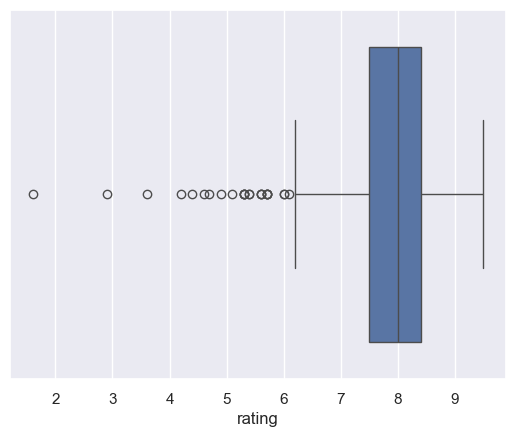

In [22]:
#finding outliers
sns.boxplot(x=data["rating"])

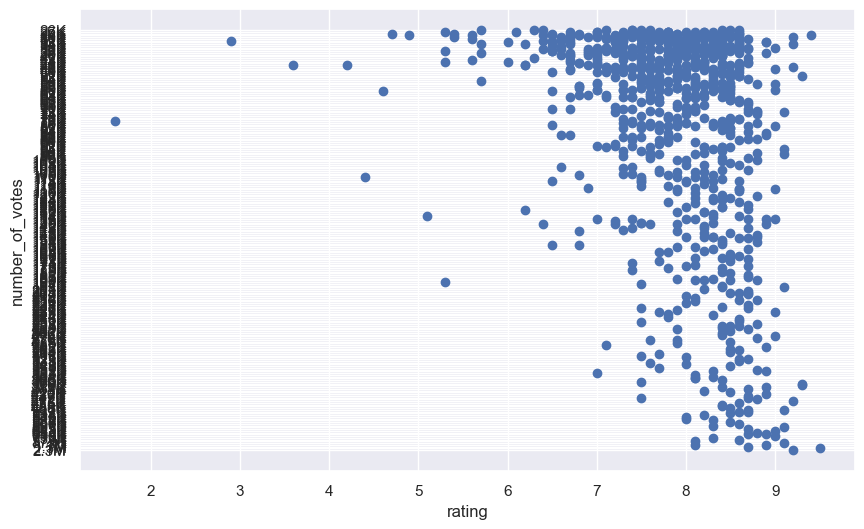

In [23]:
#rating vs number of votes
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["rating"], data["number_of_votes"])
ax.set_xlabel("rating")
ax.set_ylabel("number_of_votes")
plt.show()

In [32]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df' and the column containing abbreviated numbers is called 'voters_data'

def convert_abbreviated_number(abbrev_num):
    suffixes = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }

    # Extract the numeric part of the string
    numeric_part = float(abbrev_num[:-1])

    # Get the suffix character
    suffix_char = abbrev_num[-1].upper()

    # Multiply the numeric part by the corresponding multiplier
    if suffix_char in suffixes:
        return int(numeric_part * suffixes[suffix_char])
    else:
        return int(abbrev_num)

# Apply the conversion function to the entire column
data["number_of_votes"] = data["number_of_votes"].apply(convert_abbreviated_number)

# Now, 'voters_data' column contains the converted numerical values

In [33]:
data

,title,year,parental_rating,rating,number_of_votes,description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2300000,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2100000,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1300000,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1100000,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1100000,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
895,896. Lockwood & Co.,2023,TV-14,7.4,26000,"Lucy, a girl with psychic abilities, joins two..."
896,897. Batman,1966–1968,TV-G,7.5,26000,The Caped Crusader and his young ward battle e...
897,898. How I Met Your Father,2022–2023,TV-14,5.7,26000,Sophie and her close-knit group of friends are...
898,899. Delhi Crime,2019–,TV-MA,8.5,26000,"Based on the Nirbhaya case, Delhi Crime follow..."


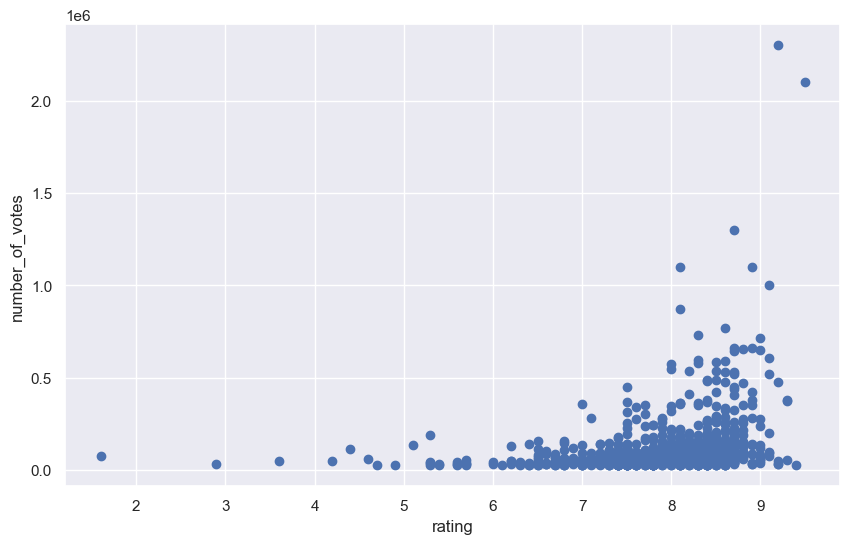

In [34]:
#rating vs number of votes
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["rating"], data["number_of_votes"])
ax.set_xlabel("rating")
ax.set_ylabel("number_of_votes")
plt.show()

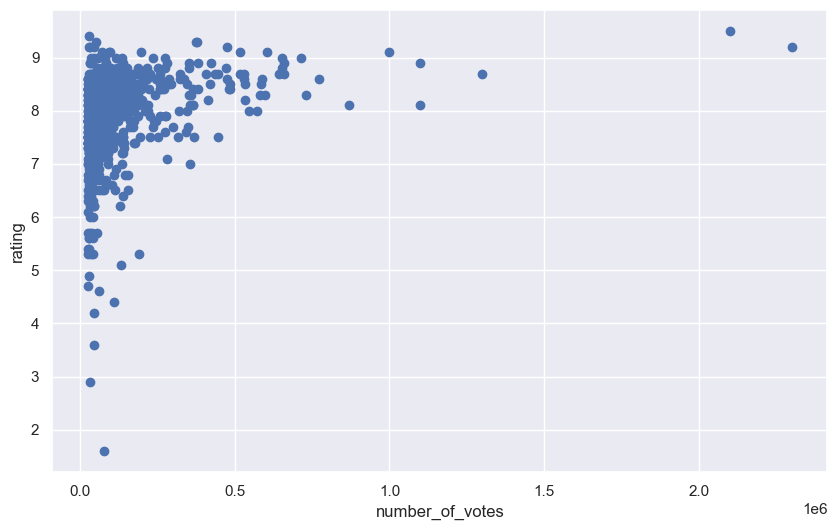

In [35]:
#rating vs number of votes
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["number_of_votes"], data["rating"])
ax.set_xlabel("number_of_votes")
ax.set_ylabel("rating")
plt.show()

In [36]:
#which parental rating has highest rating
max_rating_by_parental_rating = data.groupby('parental_rating')['rating'].max()


In [37]:
sorted_max_rating_by_parental_rating= max_rating_by_parental_rating.sort_values(ascending=False)
sorted_max_rating_by_parental_rating

parental_rating
TV-MA        9.5
TV-Y         9.4
TV-PG        9.3
TV-Y7-FV     9.3
TV-14        9.1
TV-Y7        8.9
Not Rated    8.8
TV-G         8.6
Approved     8.5
PG           8.4
R            7.9
PG-13        7.3
Name: rating, dtype: float64

In [38]:
#which parental rating has highest number of votes
rating_votes = data.groupby("parental_rating")["number_of_votes"].sum()


In [39]:
sorted_rating_votes = rating_votes.sort_values(ascending=False)

In [40]:
sorted_rating_votes

parental_rating
TV-MA        49651000
TV-14        35318000
TV-PG        11659000
TV-G           846000
TV-Y7          768000
TV-Y7-FV       617000
Not Rated      383000
PG             180000
TV-Y           158000
R              108000
PG-13           82000
Approved        66000
Name: number_of_votes, dtype: int64

In [41]:
#which parental rating has highest number of average votes
avg_rating_votes = data.groupby("parental_rating")["number_of_votes"].mean()

In [42]:
sorted_avg_rating_votes = avg_rating_votes.sort_values(ascending=False)

In [43]:
sorted_avg_rating_votes

parental_rating
PG           180000.000000
TV-MA        131700.265252
TV-14        115042.345277
R            108000.000000
TV-Y7-FV      88142.857143
PG-13         82000.000000
TV-PG         80406.896552
Approved      66000.000000
Not Rated     63833.333333
TV-Y7         51200.000000
TV-G          38454.545455
TV-Y          31600.000000
Name: number_of_votes, dtype: float64

In [53]:
846000/22

38454.545454545456

In [48]:
#top 5 high rated movies
higher_rating_movie = data.groupby("title")["rating"].max()

In [51]:
higher_rating_movie.head(5)

title
1. Game of Thrones                   9.2
10. The Office                       9.0
100. Yellowstone                     8.7
101. The End of the F***ing World    8.0
102. Criminal Minds                  8.1
Name: rating, dtype: float64

In [53]:
#top five highly voted movies
higher_voted_movie = data.groupby("title")["number_of_votes"].max()

In [54]:
higher_voted_movie.head(5)

title
1. Game of Thrones                   2300000
10. The Office                        716000
100. Yellowstone                      223000
101. The End of the F***ing World     221000
102. Criminal Minds                   220000
Name: number_of_votes, dtype: int64

In [ ]:
#we can see that there is a positive relation between the number of votes and the rating
#Game of thrones registered 2300000 votes, and 9.2 rating